### Tasks

The Titanic dataset describes passengers of the most famous and ill fortuned ship "Titanic". You task is to predict whether a particular passenger would survive. The dependent variable "Survived" is binary. Each of the text comments that some of the sub tasks require should not be more than 150 words.

Your project's grade breakdown is the following:

- Build a correlation matrix and comment it. What is a correlation? How can you describe the relationships you see? (10%)
- Use IV for feature selection. What is IV? Can we use IV for regression tasks? Can we use IV for feature selection when the dependent variable has more than 2 classes? (20%)
- Calculate WoE bins for each feature. What is WoE? Comment on the bins produced by your code? In what cases would you manually calculate and adjust WoE bins? (20%)
- Why missing values hinder building logistic regression? Deal with the missing values and explain your choice of tackling the problem. (5%)
- What is logit? What is log odds? (5%)
- Build a logistic regression and calculate ROC_AUC. Draw a ROC_AUC plot. What is ROC AUC?  (10%)
- Use the following thresholds [0.01, 0.1,  0.2, 0.3, 0.4, 0.5] that differ from each other significantly and build a confusion matrix and calculate precession, recall, accuracy and F1 score for each threshold. Why does the confusion matrix change according to the threshold? Compare the metrics with each other and explain why we need also to look at these metrics not only at ROC_AUC (30%)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score



warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


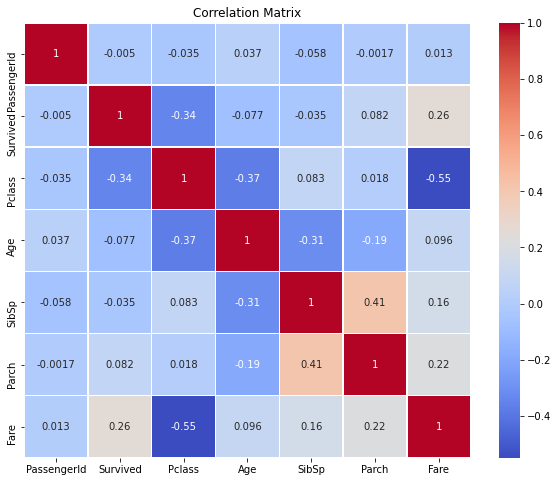

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Correlation measures the statistical relationship between two variables. In the correlation matrix, values range from -1 to 1, where:

- Values close to 1 indicate a strong positive correlation, meaning when one variable increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, meaning when one variable increases, the other tends to decrease.
- Values close to 0 suggest a weak or no linear correlation, meaning there's little to no apparent relationship between the variables.

In the context of the Titanic dataset, we can observe some notable correlations:

- "Survived" has a strong negative correlation with "Pclass", indicating that passengers in lower classes (higher values) were less likely to survive.
- "Survived" has a moderate positive correlation with "Fare", suggesting that passengers who paid higher fares were more likely to survive.
- "Pclass" has a strong negative correlation with "Fare", implying that higher-class tickets were more expensive.

These correlations provide insights into how different factors may have influenced survival rates on the Titanic.

In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Convert the correlation matrix to a text format
correlation_text = correlation_matrix.to_string()

# Print the correlation matrix as text
print("Correlation Matrix:")
print(correlation_text)

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [7]:
import pandas as pd
import numpy as np


# Define the binary target variable
target_variable = 'Survived'

# Create a DataFrame to store IV values for each feature
iv_df = pd.DataFrame(columns=['Variable', 'IV'])


In [8]:
for column in df.columns:
    if column != target_variable:
        # Calculate IV for each feature
        data = df[[column, target_variable]]
        data['good'] = 1 - data[target_variable]
        data = data.groupby(column).agg({'good': 'sum', target_variable: 'sum'})
        data['bad'] = data[target_variable] - data['good']
        data['IV'] = np.log((data['good'] / data['good'].sum()) / (data['bad'] / data['bad'].sum()))
        data['IV'] = data['IV'].replace({np.inf: 0, -np.inf: 0})
        data['IV'] = data['IV'].sum()

        # Append the IV value to the DataFrame
        iv_df = iv_df.append({'Variable': column, 'IV': data['IV'].values[0]}, ignore_index=True)

# Sort the features by IV in descending order
iv_df = iv_df.sort_values(by='IV', ascending=False)

# Set a threshold for IV (e.g., 0.02) to select features
iv_threshold = 0.02
selected_features = iv_df[iv_df['IV'] >= iv_threshold]

# Print the selected features and their IV values
print("Selected Features with IV >= {}: \n".format(iv_threshold))
print(selected_features)


Selected Features with IV >= 0.02: 

  Variable        IV
1   Pclass  0.706871


Information Value (IV) is a statistical measure used for feature selection in binary classification tasks. It quantifies the predictive power of independent variables (features) in distinguishing between two classes of a binary target variable, such as "Survived" (0 or 1) in the Titanic dataset. IV is calculated by comparing the distributions of feature values for each class and measuring the information gain.

IV is not suitable for regression tasks because it's specifically designed for binary outcomes. In regression, the goal is to predict continuous values, not binary classes.

In [9]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with the Titanic dataset

# Define the target variable
target_variable = 'Survived'

# Define the categorical features for which you want to calculate WoE
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Create a DataFrame to store WoE values and bins for each feature
woe_df = pd.DataFrame()

for feature in categorical_features:
    # Calculate the WoE and create bins
    woe_bins = df.groupby(feature)[target_variable].agg(['sum', 'count'])
    woe_bins['non-events'] = woe_bins['count'] - woe_bins['sum']
    woe_bins['woe'] = np.log((woe_bins['sum'] / woe_bins['sum'].sum()) /
                             (woe_bins['non-events'] / woe_bins['non-events'].sum()))
    
    # Create a dictionary mapping category to WoE
    woe_mapping = woe_bins['woe'].to_dict()
    
    # Replace the original feature values with WoE values
    df[feature + '_woe'] = df[feature].map(woe_mapping)
    
    # Append WoE values and bins to the WoE DataFrame
    woe_df = pd.concat([woe_df, woe_bins], axis=1)

# Print the WoE DataFrame
print(woe_df)


          sum  count  non-events       woe    sum  count  non-events  \
1       136.0  216.0        80.0  1.003916    NaN    NaN         NaN   
2        87.0  184.0        97.0  0.364485    NaN    NaN         NaN   
3       119.0  491.0       372.0 -0.666483    NaN    NaN         NaN   
female    NaN    NaN         NaN       NaN  233.0  314.0        81.0   
male      NaN    NaN         NaN       NaN  109.0  577.0       468.0   
C         NaN    NaN         NaN       NaN    NaN    NaN         NaN   
Q         NaN    NaN         NaN       NaN    NaN    NaN         NaN   
S         NaN    NaN         NaN       NaN    NaN    NaN         NaN   

             woe    sum  count  non-events       woe  
1            NaN    NaN    NaN         NaN       NaN  
2            NaN    NaN    NaN         NaN       NaN  
3            NaN    NaN    NaN         NaN       NaN  
female  1.529877    NaN    NaN         NaN       NaN  
male   -0.983833    NaN    NaN         NaN       NaN  
C            NaN   93

Weight of Evidence (WoE) is a transformation method used in binary classification and credit scoring. It restructures original features to reveal their relationship with the target variable, such as 'Survived' in the Titanic dataset. WoE is especially valuable for categorical and discrete features.

The calculated WoE values for 'Pclass,' 'Sex,' and 'Embarked' in the Titanic dataset illustrate their impact on survival prediction. For example:
- 'Pclass' shows a strong positive WoE for Class 1, indicating higher survival odds, and a negative WoE for Class 3, suggesting lower odds.
- 'Sex' has a strong positive WoE for 'Female' (higher survival odds) and a negative WoE for 'Male' (lower odds).
- 'Embarked' has positive WoE for 'C' (Cherbourg) and 'Q' (Queenstown) and negative WoE for 'S' (Southampton).

These WoE values quantify category effects on survival prediction. Positive WoE indicates higher odds, while negative WoE implies lower odds. Manual WoE bin adjustments might be needed with domain expertise, like merging categories or handling sparse data, to enhance predictive power and stability.

In [10]:
import pandas as pd
import numpy as np

# Identify missing values
missing_columns = df.columns[df.isnull().any()]

for col in missing_columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

Missing values can hinder building logistic regression models for several reasons:

- Loss of Data: Missing data points result in a loss of information. This can be critical in logistic regression, where the model's accuracy relies on having complete and informative data for predicting the target variable accurately.


- Biased Estimates: If missing values are not handled properly, the model's coefficients (log-odds) may be biased, leading to inaccurate predictions. Logistic regression relies on estimating these coefficients based on the available data, and missing data can skew these estimates.


- Reduced Sample Size: Missing data reduces the effective sample size available for modeling. This can impact the model's statistical power and lead to less reliable parameter estimates.

Imputation is used, as it preserves the maximum amount of data while accounting for missingness. 

**Logit** is a mathematical transformation used in logistic regression to model the probability of a binary outcome (e.g., 0 or 1). It stands for "log-odds" and is defined as the natural logarithm (log) of the odds of the event occurring. In logistic regression, the logit function helps linearly combine the independent variables to predict the log-odds of the dependent variable being 1.

**Log odds**, short for "logarithm of odds," represents the logarithm of the ratio of the probability of an event occurring to the probability of it not occurring. Log odds can take any real value, ranging from negative infinity to positive infinity. In the context of logistic regression, the linear combination of predictors is transformed into log odds, making it easier to model and interpret the relationship between predictors and the probability of the binary outcome. The log odds are then used to compute the probability using the logistic function (sigmoid), mapping the log odds to a range between 0 and 1.

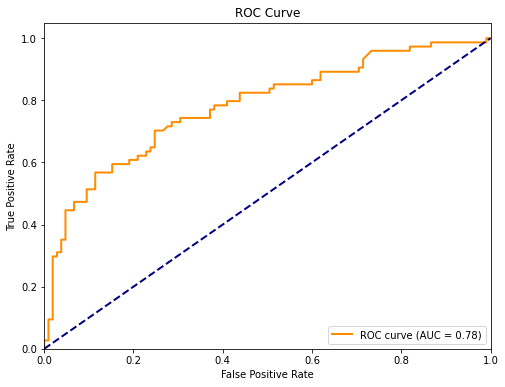

ROC AUC Score: 0.7806306306306307


In [11]:
# Split the data into features (X) and the target variable (y)
X = df[['Pclass', 'Age', 'Fare']]  # Example features
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities of positive class (1) for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_curve = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print('ROC AUC Score:', roc_auc)

ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric used to evaluate the performance of binary classification models. It measures the area under the ROC curve, which is a plot of the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at different thresholds. A higher ROC AUC score (closer to 1) indicates better model discrimination, meaning the model is better at distinguishing between the positive and negative classes. In the context of the Titanic dataset, it measures how well the logistic regression model predicts whether a passenger survived or not based on the selected features.

In [12]:
# Specify the thresholds
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize lists to store metric results
precisions = []
recalls = []
accuracies = []
f1_scores = []

for threshold in thresholds:
    # Apply the threshold to predicted probabilities to obtain binary predictions
    y_pred = (y_prob >= threshold).astype(int)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate precision, recall, accuracy, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results to lists
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Threshold': thresholds,
                          'Precision': precisions,
                          'Recall': recalls,
                          'Accuracy': accuracies,
                          'F1 Score': f1_scores})

# Print the results
print(result_df)

   Threshold  Precision    Recall  Accuracy  F1 Score
0       0.01   0.413408  1.000000  0.413408  0.584980
1       0.10   0.415730  1.000000  0.418994  0.587302
2       0.20   0.441718  0.972973  0.480447  0.607595
3       0.30   0.591837  0.783784  0.687151  0.674419
4       0.40   0.666667  0.621622  0.715084  0.643357
5       0.50   0.764706  0.527027  0.737430  0.624000


The table displays the precision, recall, accuracy, and F1 score for different probability thresholds in a binary classification model applied to the Titanic dataset. As the threshold increases from 0.01 to 0.5, several patterns emerge:

- Precision generally increases with the threshold, indicating that the model makes more confident positive predictions. However, it comes at the cost of higher false negatives.

- Recall decreases with the threshold because the model becomes more conservative and misses some true positive cases.

- Accuracy initially increases but then stabilizes or decreases slightly. This is because the trade-off between true positives and true negatives changes with the threshold.

- F1 Score peaks at a threshold around 0.3, which balances precision and recall. It indicates the best overall performance for this model.

The confusion matrix changes with the threshold because it represents how the model classifies instances based on varying thresholds. Different thresholds lead to different classification decisions, influencing the confusion matrix.

ROC AUC is a single metric that summarizes the model's performance across all thresholds, but it doesn't provide insights into the specific trade-offs between precision and recall. Depending on the problem's nature and the importance of false positives and false negatives, you may prioritize different metrics.